In [327]:
import pandas as pd
from pandas import DataFrame
from sklearn import linear_model
import statsmodels.api as sm
import tkinter as tk 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

## Load Dataset

In [328]:
directory = '/Users/James/Desktop/Test/'
df = pd.read_csv(directory+'test.csv', header=0)

df1 = pd.DataFrame(df,columns=['Miles','SeatClass','Time','Roundtrip','WhentoBuy'])
df

,Departure,Arrival,FlightDate,Miles,SeatClass,Roundtrip,Time,WhentoBuy
0,ATL,DTW,3/6/2019,594,0,0,0,20
1,ATL,DTW,3/6/2019,594,0,0,1,25
2,ATL,DTW,3/6/2019,594,0,0,2,20
3,ATL,DTW,3/6/2019,594,0,1,0,120
4,ATL,DTW,3/6/2019,594,0,1,1,93
5,ATL,DTW,3/6/2019,594,0,1,2,93
6,ATL,DTW,3/6/2019,594,1,0,0,82
7,ATL,DTW,3/6/2019,594,1,0,1,78
8,ATL,DTW,3/6/2019,594,1,0,2,78
9,ATL,DTW,3/6/2019,594,1,1,0,115


In [245]:
print(df1)


    Miles  SeatClass  Time  Roundtrip  WhentoBuy
0     594          0     0          0         20
1     594          0     1          0         25
2     594          0     2          0         20
3     594          0     0          1        120
4     594          0     1          1         93
5     594          0     2          1         93
6     594          1     0          0         82
7     594          1     1          0         78
8     594          1     2          0         78
9     594          1     0          1        115
10    594          1     1          1        116
11    594          1     2          1        116
12    594          2     0          0         82
13    594          2     1          0         78
14    594          2     2          0         78
15    594          2     0          1        115
16    594          2     1          1        117
17    594          2     2          1        117
18    946          0     0          0         21
19    946          0

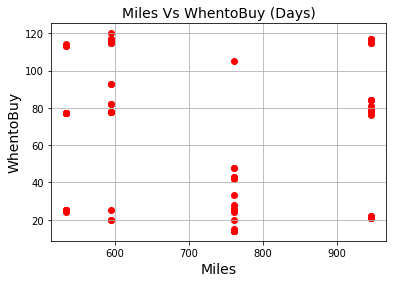

In [329]:
plt.scatter(df['Miles'], df['WhentoBuy'], color='red')
plt.title('Miles Vs WhentoBuy (Days)', fontsize=14)
plt.xlabel('Miles', fontsize=14)
plt.ylabel('WhentoBuy', fontsize=14)
plt.grid(True)
plt.show()

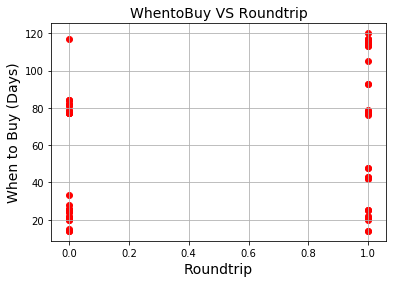

In [247]:
plt.scatter(df['Roundtrip'], df['WhentoBuy'], color='red')
plt.title('WhentoBuy VS Roundtrip', fontsize=14)
plt.xlabel('Roundtrip', fontsize=14) # 0 is Roundtrip False, 1 is Roundtrip True
plt.ylabel('When to Buy (Days)', fontsize=14)
plt.grid(True)
plt.show()

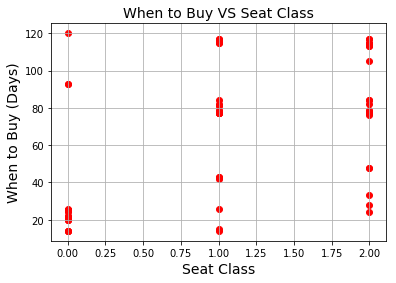

In [248]:
plt.scatter(df['SeatClass'], df['WhentoBuy'], color='red')
plt.title('When to Buy VS Seat Class', fontsize=14)
plt.xlabel('Seat Class', fontsize=14) #0 is Economy, 1 is Business, 2 is First Class
plt.ylabel('When to Buy (Days)', fontsize=14)
plt.grid(True)
plt.show()

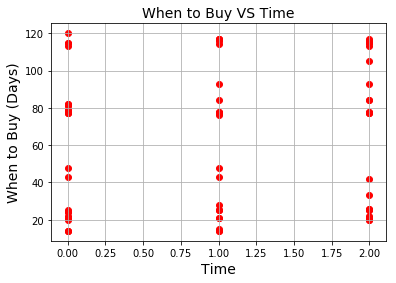

In [330]:
plt.scatter(df['Time'], df['WhentoBuy'], color='red')
plt.title('When to Buy VS Time', fontsize=14)
plt.xlabel('Time', fontsize=14) #0 is Morning, 1 is Afternoon, 2 is Evening
plt.ylabel('When to Buy (Days)', fontsize=14)
plt.grid(True)
plt.show()

C:\Users\James\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


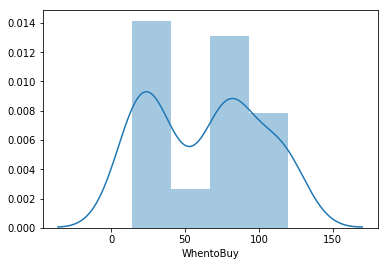

In [332]:
sns.distplot(df1['WhentoBuy'])

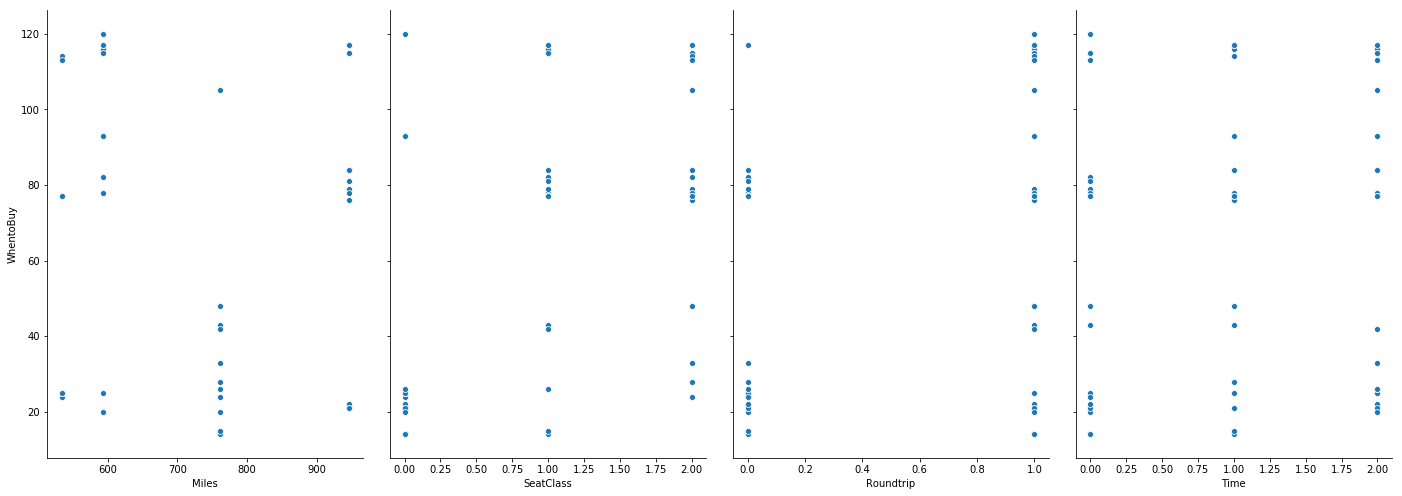

In [252]:
sns.pairplot(df1, x_vars=['Miles','SeatClass','Roundtrip','Time'], y_vars='WhentoBuy', height=7, aspect=0.7)

In [253]:
df.describe()

,Miles,SeatClass,Roundtrip,Time,WhentoBuy
count,72.000000,72.000000,72.000000,72.000000,72.000000
mean,708.750000,1.000000,0.500000,1.000000,62.958333
std,161.376539,0.822226,0.503509,0.822226,36.959223
min,534.000000,0.000000,0.000000,0.000000,14.000000
25%,579.000000,0.000000,0.000000,0.000000,25.000000
50%,677.500000,1.000000,0.500000,1.000000,77.000000
75%,807.250000,2.000000,1.000000,2.000000,84.000000
max,946.000000,2.000000,1.000000,2.000000,120.000000


In [254]:
df.corr()

,Miles,SeatClass,Roundtrip,Time,WhentoBuy
Miles,1.000000,0.000000,0.000000,0.000000,-0.142397
SeatClass,0.000000,1.000000,0.000000,0.000000,0.560806
Roundtrip,0.000000,0.000000,1.000000,0.000000,0.304633
Time,0.000000,0.000000,0.000000,1.000000,0.067204
WhentoBuy,-0.142397,0.560806,0.304633,0.067204,1.000000


## Set the columns for X and Y

In [333]:
X = df1[['Miles','SeatClass','Roundtrip','Time']] #F0r the X axis, we will keep all columns except for WhentoBuy
Y = df1['WhentoBuy'] #This column is what we are getting an estimation on


## Split Data into training and test datasets

In [334]:
# Modify Test Size
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,Y,test_size=.3,random_state=0)

In [335]:
# Check size of training and test datasets
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(50, 4) (50,)
(22, 4) (22,)


## Set the values for making a prediction

In [339]:
#Prediction for when to buy for Miles (0 to 1000), Business Class(1), Roundtrip(1), and Evening(2)
X_test=[[600,0, 0, 1]]

## Linear Regression

In [340]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

model=lm.fit(X_train,y_train)
predictions_train = lm.predict(X_train)
print ('Predictions: \n', predictions_train)

Predictions: 
 [ 32.72211721  55.4480416   85.18534071  47.68193263  15.83143919
  74.85573587  79.15343611  61.4799462   79.30361473 112.35914395
  42.85506381  73.42731602  83.60131496  93.73426157  16.51621366
  75.01134176 106.32723935 100.45094064  10.48430906  20.65830801
  98.56113039  59.74574183 104.59303499  22.54811826  66.71063694
  58.16171609  77.56941036  41.95581254  28.42441697 110.62493959
  41.27103807  80.88764047  68.29466269  49.41613699  34.45632157
  26.69021261  48.88696841  71.53750576  47.30294267  35.92390794
  46.09790688  49.57174288  22.39251237  37.50793368  73.12153151
  78.77444615  72.74254154  74.32656729  86.91954508  59.89592045]


In [342]:
# Predict using test dataset

predictions_test = lm.predict(X_test)
print ('Predictions: \n', predictions_test)


Predictions: 
 [26.51679217]


In [344]:
print('Coefficients: \n', lm.coef_)
# The mean squared error
print("Mean squared error: %.2f" % np.mean((lm.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % lm.score(X_train, y_train))

Coefficients: 
 [-0.02890341 25.43959888 27.02362462  6.0319046 ]
Mean squared error: 2601.77
Variance score: 0.47


In [301]:
import statsmodels.formula.api as sm
lm2 = sm.OLS(y_train,X_train).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              WhentoBuy   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     58.12
Date:                Tue, 09 Apr 2019   Prob (F-statistic):           2.08e-17
Time:                        18:08:56   Log-Likelihood:                -239.99
No. Observations:                  50   AIC:                             488.0
Df Residuals:                      46   BIC:                             495.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Miles          0.0153      0.011      1.332      0.189      -0.008       0.038
SeatClass     27.6000      5.166      5.342      0.000      17.201      37.999
Roundtrip     31.6302      8.316      3.804      0.000      14.891      48.369
Time           7.9032      5.098      1.550      0.128      -2.360      18.166
==============================================================================
Omnibus:                        0.766   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.682   Jarque-Bera (JB):                0.626
Skew:                           0.267   Prob(JB):                        0.731
Kurtosis:                       2.877   Cond. No.                     1.35e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Decision Tree Regression

In [345]:
#To train the tree, we'll instantiate the DecisionTreeRegressor class and call the fit method:

from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=0)
tree_reg.fit(X_train,y_train)

#To make predictions on the test set, ues the predict method:
tree_train = tree_reg.predict(X_train)
tree_test = tree_reg.predict(X_test)

In [346]:
print('Predictions (Training data): \n', tree_train)

Predictions (Training data): 
 [ 20.  25. 116. 120.  14.  77. 116.  25.  77. 113.  14.  84.  78.  48.
  21. 115. 114. 115.  21.  20. 115.  93. 117.  22.  24.  78.  78. 117.
  25. 117.  14.  77.  43.  25.  25.  25.  14.  82.  15.  81.  82.  21.
  24.  22. 115.  33.  28.  43.  77.  77.]


In [347]:
print('Predictions: \n', tree_test)

Predictions: 
 [25.]


In [348]:
scorereg=tree_reg.score(X_train,y_train)
print ('Accuracy Score: \n', scorereg*100,'%')

Accuracy Score: 
 100.0 %


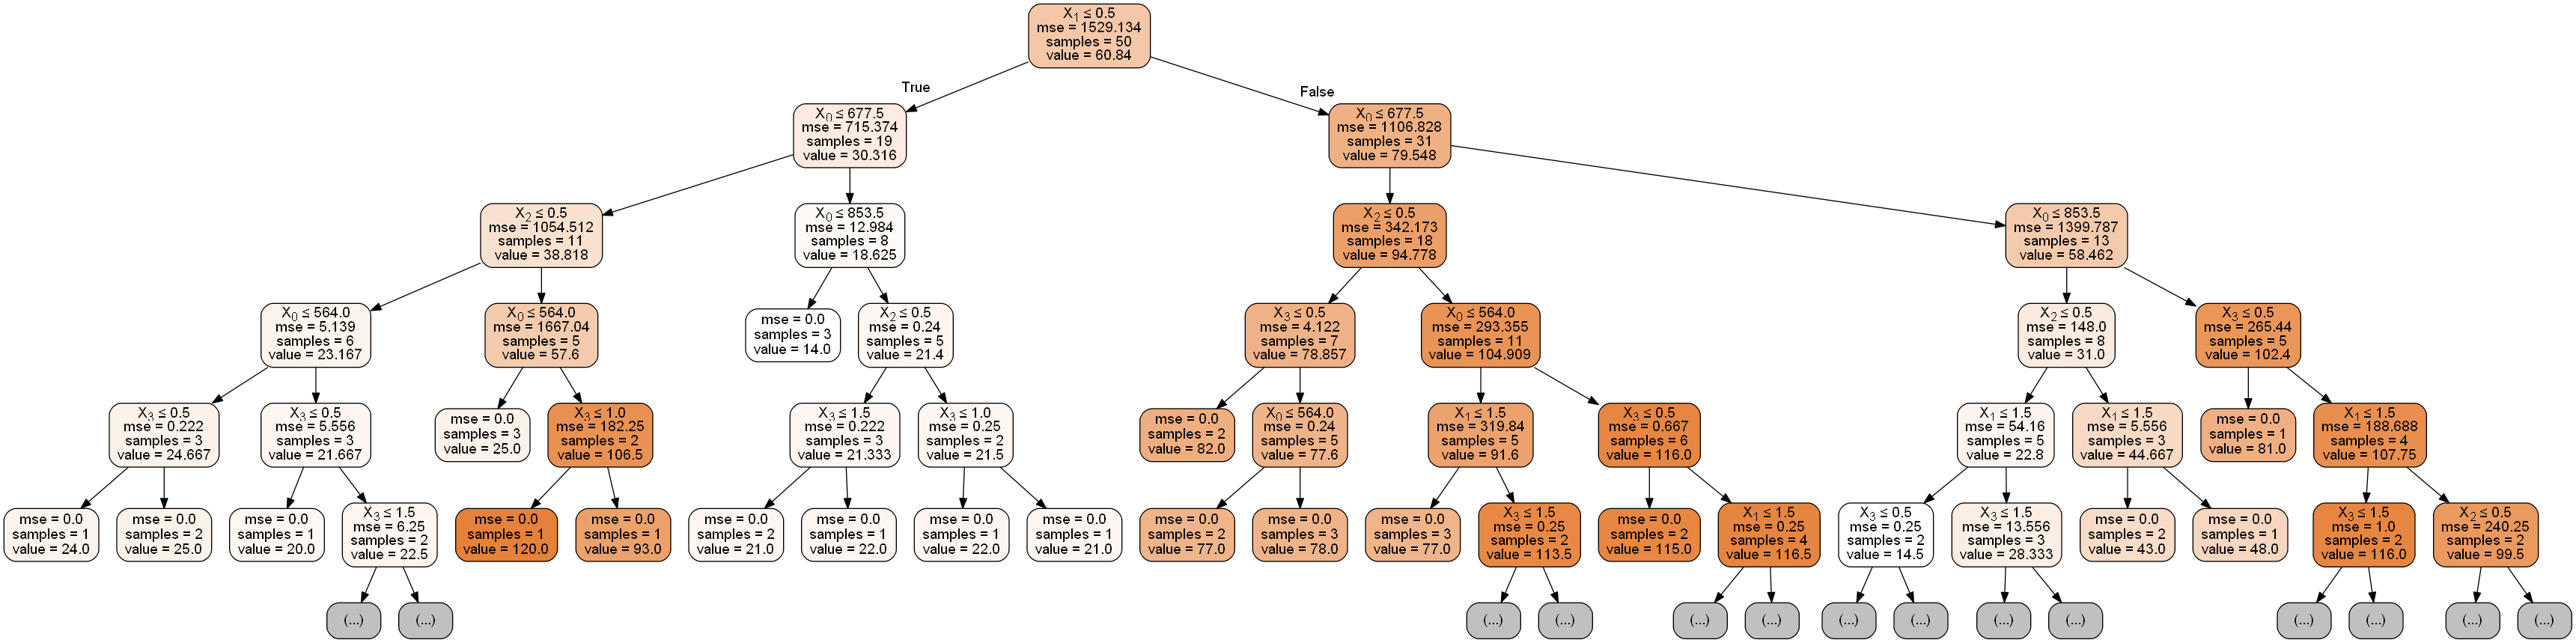

In [349]:
#visualizing decision tree
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(tree_reg, out_file=dot_data, max_depth=5,
filled=True, rounded=True,
special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [350]:
# The mean squared error
print("Mean squared error: %.2f" % np.mean((tree_reg.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % tree_reg.score(X_train, y_train))

Mean squared error: 2729.23
Variance score: 1.00


## Polynomial Regression


In [351]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
poly1 = PolynomialFeatures(degree=2)
X_ = poly1.fit_transform(X_train)
X_test_ = poly1.fit_transform(X_test)

In [352]:
# Instantiate
poly = LinearRegression()
# Fit
poly.fit(X_, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [353]:
polytrain=poly.predict(X_)
print('Predictions (Training Data): \n', polytrain)

Predictions (Training Data): 
 [ 13.74032599  49.89835577  95.02701926  41.52653435   5.83831502
 108.79829837  87.27268611  51.15477545  77.65871798 125.69406402
  15.49208511  84.34869085  71.61298585  65.77327972  24.73221039
  97.85062455 115.11214574 108.53143252  25.00544351  25.10762639
  95.93277371  36.99794322  97.63809733  35.17073611  40.93493292
  64.17711368  62.61525803  66.15889622  27.62950472 110.05517978
  44.88708173 104.00570851  62.13314017  59.35369492  25.46656976
  14.06809677  12.97978375  64.32928905  43.61817503  61.76938005
  66.21891548  44.16890106  40.50419851  27.1648992   90.23011179
  58.43437697  44.32877553  64.28358811 109.92487749  76.64438345]


In [354]:
# Predict
polyresults=poly.predict(X_test_)
print('Predictions: \n', polyresults)

Predictions: 
 [12.95832107]


In [355]:
scorepr = poly.score(X_, y_train)
print('Accuracy Score: \n',scorepr*100,'%')

Accuracy Score: 
 64.47505801920094 %


In [356]:
# The mean squared error
print("Mean squared error: %.2f" % np.mean((poly.predict(X_test_) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % poly.score(X_, y_train))

Mean squared error: 3904.34
Variance score: 0.64


## Random Forest Regression


In [357]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(X_train, y_train)

forest_train = forest_reg.predict(X_train)
forest_test = forest_reg.predict(X_test)

In [358]:
print('Predictions (Training Dataset): \n', forest_train)

Predictions (Training Dataset): 
 [ 22.   25.  112.1  99.9  15.7  80.8 112.1  31.8  81.1 105.9  14.   93.5
  78.   43.6  21.4 112.3 106.4 105.7  21.1  30.4 115.6  83.8 116.2  21.8
  23.8  78.   78.4 102.9  24.4 116.2  16.3  77.   40.1  34.5  24.4  23.5
  16.2  84.5  18.8  92.1  84.5  37.6  33.5  21.8 111.6  30.2  26.3  50.3
  77.   77.1]


In [359]:
print('Days in Advance to Book: \n', forest_test)

Days in Advance to Book: 
 [23.5]


In [361]:
scoretr=forest_reg.score(X_train,y_train)
print ('Accuracy Score: \n', scoretr*100,'%')

Accuracy Score: 
 97.47912282922941 %


In [362]:

# The mean squared error
print("Mean squared error: %.2f" % np.mean((forest_reg.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % forest_reg.score(X_train, y_train))

Mean squared error: 2859.80
Variance score: 0.97


## Support Vector Regression


In [363]:
from sklearn.svm import SVR 
svrmodel = SVR()

In [364]:
svrmodel.fit(X_train,y_train)
svr_train =svrmodel.predict(X_train)
svr_test = svrmodel.predict(X_test)

C:\Users\James\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [365]:
print('Predictions (Training Dataset): \n', svr_train)

Predictions (Training Dataset): 
 [65.31960898 61.48455099 68.57802459 66.23119093 56.70311255 63.45362038
 69.60448327 61.9662618  65.49836868 65.88784161 56.62415312 64.72564032
 68.41693088 56.55194304 61.22556703 63.53993091 65.97707304 64.76374634
 61.26610727 65.31960898 68.83709103 66.23119093 69.95520032 61.57086152
 56.36167291 67.80030084 69.44805701 63.15653041 61.11474212 68.83709103
 55.32869985 64.24176543 55.39207448 61.35031714 61.68734841 65.72233596
 56.76006695 68.41693088 55.31510821 62.70234044 67.80030084 61.71786302
 61.01394685 61.1953178  68.57802459 58.14331511 56.20439633 55.44927232
 64.43821236 64.01229747]


In [366]:
print('Days in Advance to Book: \n', svr_test)

Days in Advance to Book: 
 [62.62927873]


In [367]:
svrscore=svrmodel.score(X_train,y_train)
print ('Accuracy Score: \n', svrscore*100,'%')

Accuracy Score: 
 14.913002193998093 %


In [311]:
# The mean squared error
print("Mean squared error: %.2f" % np.mean((svrmodel.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % svrmodel.score(X_train, y_train))

Mean squared error: 926.18
Variance score: 0.15


## K Nearest Neighbor Regression


In [368]:
from sklearn.neighbors import KNeighborsRegressor
clf=KNeighborsRegressor(2)
clf.fit(X_train,y_train)
clf_train=clf.predict(X_train)
clf_test=clf.predict(X_test)

In [369]:
print('Predictions (Training Dataset): \n', clf_train)

Predictions (Training Dataset): 
 [ 56.5  25.  116.   70.   14.   77.  116.   25.   95.5 113.5  14.   99.5
  78.   36.   21.  115.   95.5  99.5  21.   70.  116.   56.5 116.5  21.5
  36.   49.   78.   69.   25.  116.5  14.   51.   28.5  25.   25.   22.5
  14.   98.5  14.5  51.   51.   68.   24.5  21.5 117.5  30.5  26.   43.
  51.   51. ]


In [370]:
print('Days in Advance to Book: \n', clf_test)

Days in Advance to Book: 
 [22.5]


In [371]:
clfscore=clf.score(X_train,y_train)
print ('Accuracy Score: \n', clfscore*100,'%')

Accuracy Score: 
 75.32133212096987 %


In [312]:
# The mean squared error
print("Mean squared error: %.2f" % np.mean((clf.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % clf.score(X_train, y_train))

Mean squared error: 3040.89
Variance score: 0.75


## Logistic Regression 

In [225]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
logreg_train=logreg.predict(X_train)
logreg_test=logreg.predict(X_test)

C:\Users\James\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\James\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [226]:
print('Predictions (Training Dataset): \n', logreg_train)

Predictions (Training Dataset): 
 [ 25  25  77  14  14 115 115  25  78  77  14  78  78 115  21 115  77 115
  14  14 115  25 115  21  82  78  78  21  25  77  14 115 115  14  25  25
  25  82  21  14  14  25  14  14 115  78 115 115  77  78]


In [227]:
print('Days in Advance to Book: \n', logreg_test)

Days in Advance to Book: 
 [14]


In [230]:
logscore=logreg.score(X_train,y_train)
print ('Accuracy Score: \n', logscore*100,'%')

Accuracy Score: 
 36.0 %


In [313]:
# The mean squared error
print("Mean squared error: %.2f" % np.mean((logreg.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % logreg.score(X_train, y_train))

Mean squared error: 3791.23
Variance score: 0.36


## Creating a GUI

In [373]:
# tkinter GUI
import tkinter as tk 
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg


root= tk.Tk()
root.title("Capstone Project: When to Buy Airline Tickets")
canvas1 = tk.Canvas(root, width = 500, height = 300)
canvas1.pack()

# with sklearn


# New_Miles label and input box
label1 = tk.Label(root, text='How Many Miles is Destination (0 to 1000): ')
canvas1.create_window(70, 100, window=label1)


entry1 = tk.Entry (root) # create 1st entry box
canvas1.create_window(270, 100, window=entry1)

# New_SeatClass label and input box
label2 = tk.Label(root, text='Type Seat Class (0 for Economy, 1 for Business, 2 for First Class: ')
canvas1.create_window(30, 120, window=label2)

entry2 = tk.Entry (root) # create 2nd entry box
canvas1.create_window(270, 120, window=entry2)

# New_Roundtrip label and input box
label3 = tk.Label(root, text='Roundtrip? (0 for No, 1 for Yes): ')
canvas1.create_window(70, 140, window=label3)

entry3 = tk.Entry (root) # create 3rd entry box
canvas1.create_window(270, 140, window=entry3)

# New_Time label and input box
label4 = tk.Label(root, text='Departure Time? (0 for Morning, 1 for Afternoon, 2 for Evening): ')
canvas1.create_window(30, 160, window=label4)

entry4 = tk.Entry (root) # create 4th entry box
canvas1.create_window(270, 160, window=entry4)


def values(): 
    global New_Miles #our 1st input variable
    New_Miles = float(entry1.get()) 
    
    global New_SeatClass #our 2nd input variable
    New_SeatClass = float(entry2.get()) 
    global New_Roundtrip #our 3rd input variable
    New_Roundtrip = float(entry3.get()) 
    global New_Time #our 4th input variable
    New_Time = float(entry4.get()) 
    Input = [[New_Miles, New_SeatClass, New_Roundtrip, New_Time]]
    Prediction_result  = ('Predicted When to Buy: ', tree_reg.predict(Input))
    label_Prediction = tk.Label(root, text= Prediction_result, bg='orange')
    canvas1.create_window(270, 260, window=label_Prediction)
def ExitApplication():
    MsgBox = tk.messagebox.askquestion ('Exit Application','Are you sure you want to exit the application',icon = 'warning')
    if MsgBox == 'yes':
       root.destroy()
    else:
        tk.messagebox.showinfo('Return','You will now return to the application screen')
        
button1 = tk.Button (root, text='Predict When to Buy',command=values, bg='orange') # button to call the 'values' command above 
canvas1.create_window(270, 190, window=button1)

button2 = tk.Button (root, text='Exit Application',command=ExitApplication, bg='orange') 
canvas1.create_window(270, 220, window=button2)
 

#plot 1st scatter 
figure3 = plt.Figure(figsize=(5,4), dpi=100)
ax3 = figure3.add_subplot(111)
ax3.scatter(df['Miles'].astype(float),df['WhentoBuy'].astype(float), color = 'r')
scatter3 = FigureCanvasTkAgg(figure3, root) 
scatter3.get_tk_widget().pack(side=tk.RIGHT, fill=tk.BOTH)
ax3.legend() 
ax3.set_xlabel('Miles')
ax3.set_title('Airport Distances vs When to Buy')

#plot 2nd scatter 
figure4 = plt.Figure(figsize=(5,4), dpi=100)
ax4 = figure4.add_subplot(111)
ax4.scatter(df['SeatClass'].astype(float),df['WhentoBuy'].astype(float), color = 'g')
scatter4 = FigureCanvasTkAgg(figure4, root) 
scatter4.get_tk_widget().pack(side=tk.RIGHT, fill=tk.BOTH)
ax4.legend() 
ax4.set_xlabel('Seat Class')
ax4.set_title('Seat Class vs When to Buy')

root.mainloop()